
# Choosing Colormaps in Matplotlib

Matplotlib has a number of built-in colormaps accessible via
`.matplotlib.colormaps`.  There are also external libraries that
have many extra colormaps, which can be viewed in the
`Third-party colormaps`_ section of the Matplotlib documentation.
Here we briefly discuss how to choose between the many options.  For
help on creating your own colormaps, see
:doc:`/tutorials/colors/colormap-manipulation`.

## Overview

The idea behind choosing a good colormap is to find a good representation in 3D
colorspace for your data set. The best colormap for any given data set depends
on many things including:

- Whether representing form or metric data ([Ware]_)

- Your knowledge of the data set (*e.g.*, is there a critical value
  from which the other values deviate?)

- If there is an intuitive color scheme for the parameter you are plotting

- If there is a standard in the field the audience may be expecting

For many applications, a perceptually uniform colormap is the best choice;
i.e. a colormap in which equal steps in data are perceived as equal
steps in the color space. Researchers have found that the human brain
perceives changes in the lightness parameter as changes in the data
much better than, for example, changes in hue. Therefore, colormaps
which have monotonically increasing lightness through the colormap
will be better interpreted by the viewer. Wonderful examples of
perceptually uniform colormaps can be found in the
`Third-party colormaps`_ section as well.

Color can be represented in 3D space in various ways. One way to represent color
is using CIELAB. In CIELAB, color space is represented by lightness,
$L^*$; red-green, $a^*$; and yellow-blue, $b^*$. The lightness
parameter $L^*$ can then be used to learn more about how the matplotlib
colormaps will be perceived by viewers.

An excellent starting resource for learning about human perception of colormaps
is from [IBM]_.



## Classes of colormaps

Colormaps are often split into several categories based on their function (see,
*e.g.*, [Moreland]_):

1. Sequential: change in lightness and often saturation of color
   incrementally, often using a single hue; should be used for
   representing information that has ordering.

2. Diverging: change in lightness and possibly saturation of two
   different colors that meet in the middle at an unsaturated color;
   should be used when the information being plotted has a critical
   middle value, such as topography or when the data deviates around
   zero.

3. Cyclic: change in lightness of two different colors that meet in
   the middle and beginning/end at an unsaturated color; should be
   used for values that wrap around at the endpoints, such as phase
   angle, wind direction, or time of day.

4. Qualitative: often are miscellaneous colors; should be used to
   represent information which does not have ordering or
   relationships.


In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

First, we'll show the range of each colormap. Note that some seem
to change more "quickly" than others.



In [4]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

### Sequential

For the Sequential plots, the lightness value increases monotonically through
the colormaps. This is good. Some of the $L^*$ values in the colormaps
span from 0 to 100 (binary and the other grayscale), and others start around
$L^*=20$. Those that have a smaller range of $L^*$ will accordingly
have a smaller perceptual range. Note also that the $L^*$ function varies
amongst the colormaps: some are approximately linear in $L^*$ and others
are more curved.



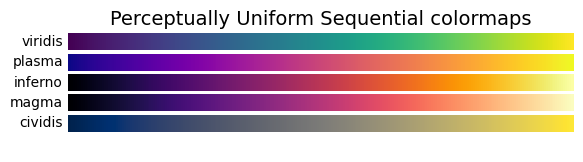

In [5]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

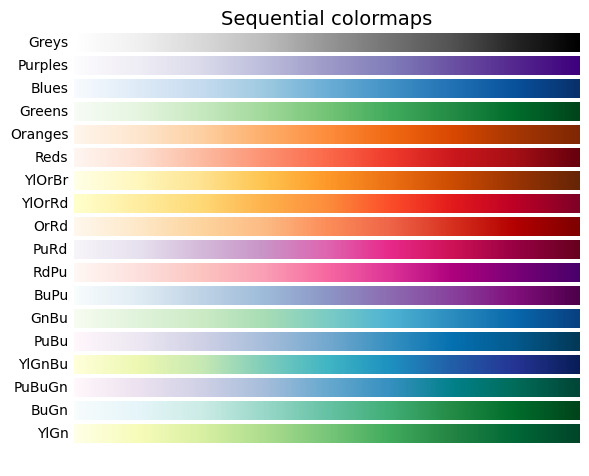

In [6]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

### Sequential2

Many of the $L^*$ values from the Sequential2 plots are monotonically
increasing, but some (autumn, cool, spring, and winter) plateau or even go both
up and down in $L^*$ space. Others (afmhot, copper, gist_heat, and hot)
have kinks in the $L^*$ functions. Data that is being represented in a
region of the colormap that is at a plateau or kink will lead to a perception of
banding of the data in those values in the colormap (see [mycarta-banding]_ for
an excellent example of this).



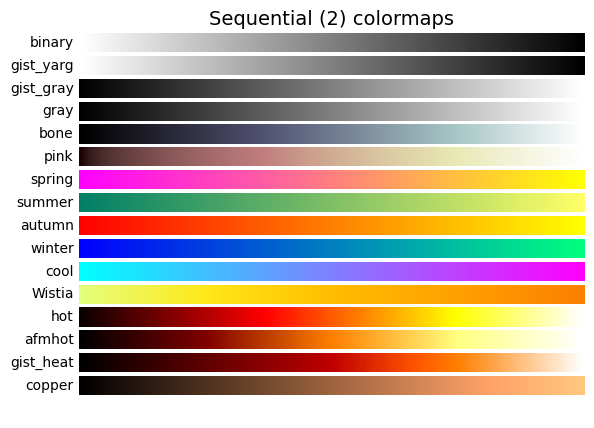

In [7]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

### Diverging

For the Diverging maps, we want to have monotonically increasing $L^*$
values up to a maximum, which should be close to $L^*=100$, followed by
monotonically decreasing $L^*$ values. We are looking for approximately
equal minimum $L^*$ values at opposite ends of the colormap. By these
measures, BrBG and RdBu are good options. coolwarm is a good option, but it
doesn't span a wide range of $L^*$ values (see grayscale section below).



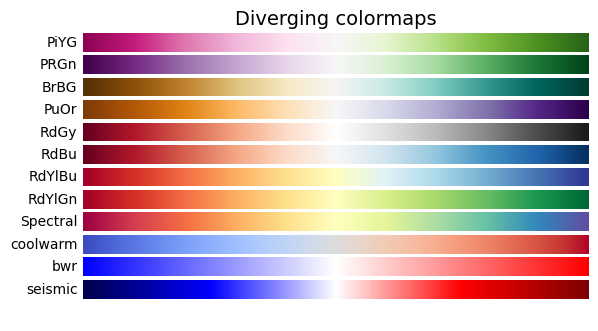

In [8]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

### Cyclic

For Cyclic maps, we want to start and end on the same color, and meet a
symmetric center point in the middle. $L^*$ should change monotonically
from start to middle, and inversely from middle to end. It should be symmetric
on the increasing and decreasing side, and only differ in hue. At the ends and
middle, $L^*$ will reverse direction, which should be smoothed in
$L^*$ space to reduce artifacts. See [kovesi-colormaps]_ for more
information on the design of cyclic maps.

The often-used HSV colormap is included in this set of colormaps, although it
is not symmetric to a center point. Additionally, the $L^*$ values vary
widely throughout the colormap, making it a poor choice for representing data
for viewers to see perceptually. See an extension on this idea at
[mycarta-jet]_.



In [ ]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

### Qualitative

Qualitative colormaps are not aimed at being perceptual maps, but looking at the
lightness parameter can verify that for us. The $L^*$ values move all over
the place throughout the colormap, and are clearly not monotonically increasing.
These would not be good options for use as perceptual colormaps.



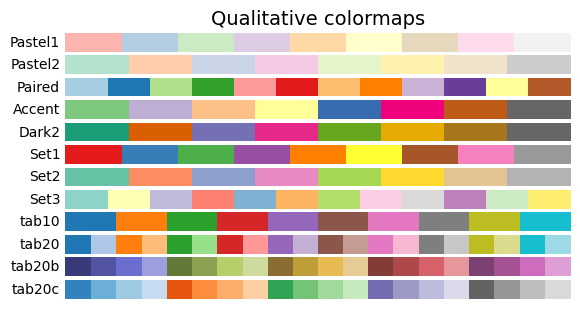

In [9]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

### Miscellaneous

Some of the miscellaneous colormaps have particular uses for which
they have been created. For example, gist_earth, ocean, and terrain
all seem to be created for plotting topography (green/brown) and water
depths (blue) together. We would expect to see a divergence in these
colormaps, then, but multiple kinks may not be ideal, such as in
gist_earth and terrain. CMRmap was created to convert well to
grayscale, though it does appear to have some small kinks in
$L^*$.  cubehelix was created to vary smoothly in both lightness
and hue, but appears to have a small hump in the green hue area. turbo
was created to display depth and disparity data.

The often-used jet colormap is included in this set of colormaps. We can see
that the $L^*$ values vary widely throughout the colormap, making it a
poor choice for representing data for viewers to see perceptually. See an
extension on this idea at [mycarta-jet]_ and [turbo]_.



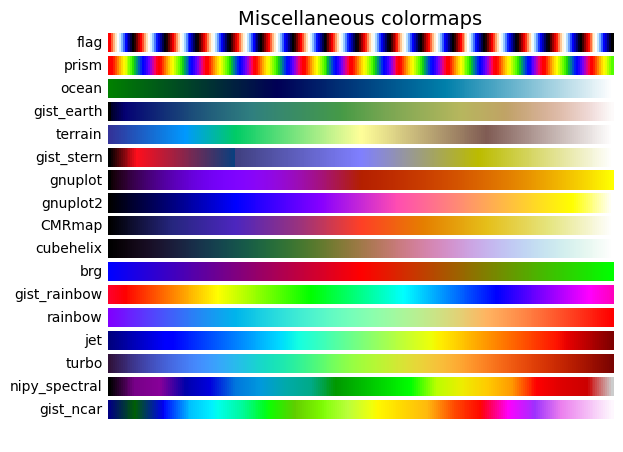

In [10]:
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()

## Lightness of Matplotlib colormaps

Here we examine the lightness values of the matplotlib colormaps.
Note that some documentation on the colormaps is available
([list-colormaps]_).



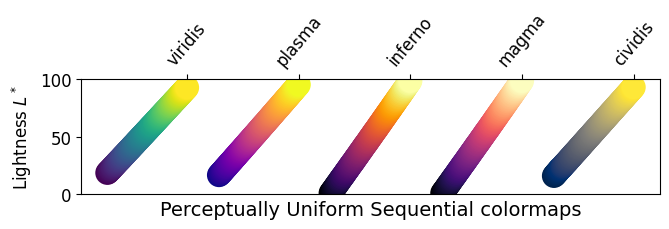

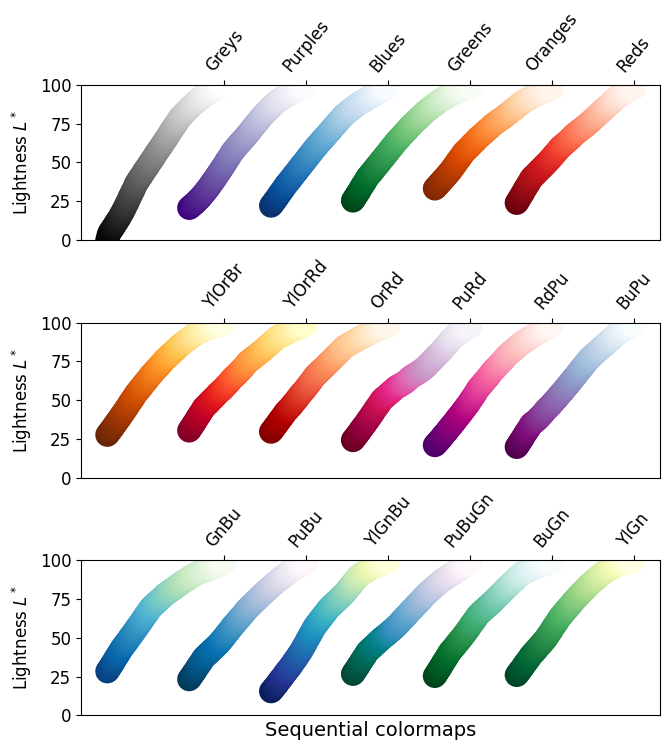

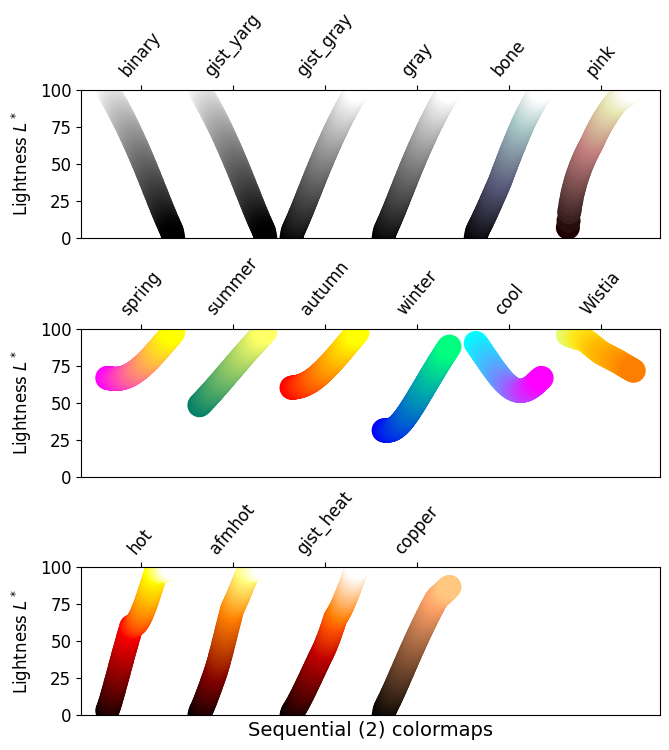

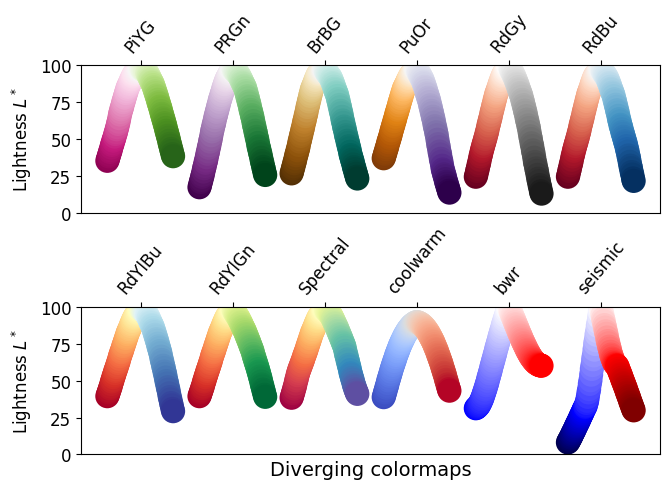

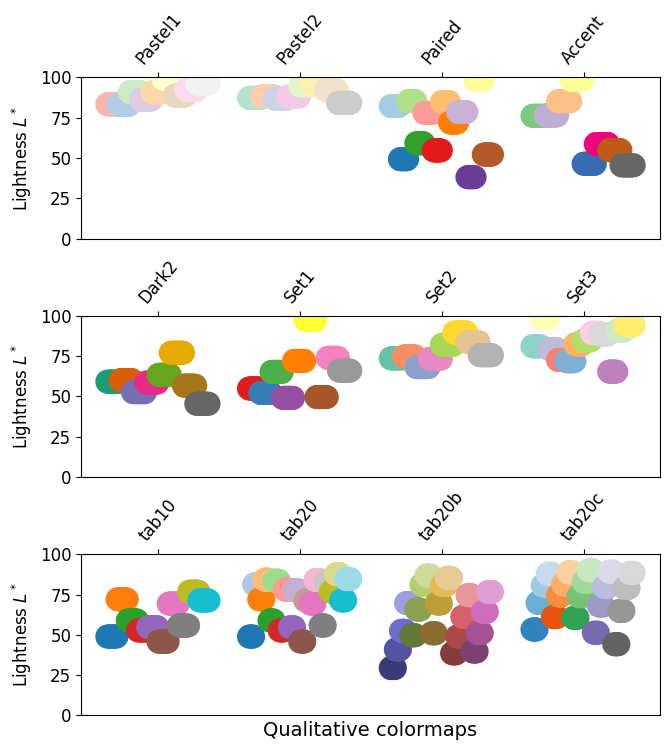

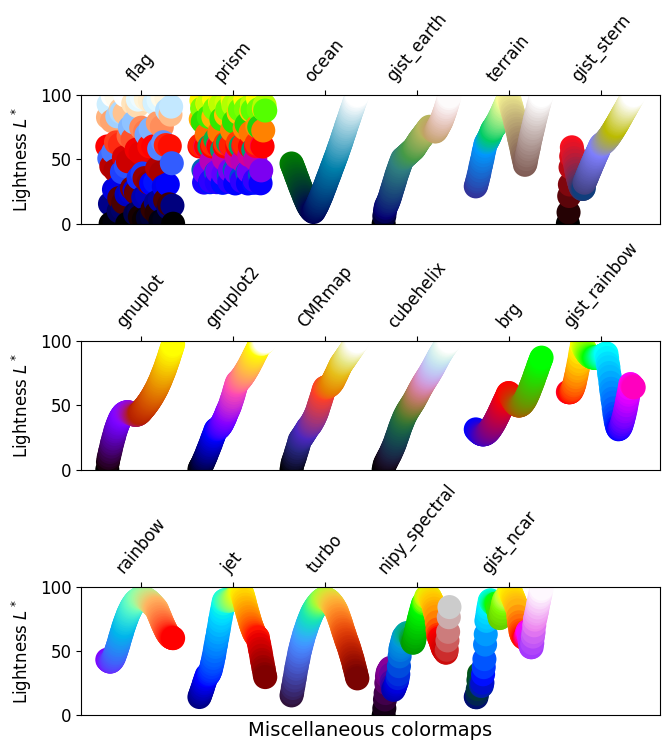

In [11]:
mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(nrows=nsubplots, squeeze=False,
                            figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axs.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness, but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

## Grayscale conversion

It is important to pay attention to conversion to grayscale for color
plots, since they may be printed on black and white printers.  If not
carefully considered, your readers may end up with indecipherable
plots because the grayscale changes unpredictably through the
colormap.

Conversion to grayscale is done in many different ways [bw]_. Some of the
better ones use a linear combination of the rgb values of a pixel, but
weighted according to how we perceive color intensity. A nonlinear method of
conversion to grayscale is to use the $L^*$ values of the pixels. In
general, similar principles apply for this question as they do for presenting
one's information perceptually; that is, if a colormap is chosen that is
monotonically increasing in $L^*$ values, it will print in a reasonable
manner to grayscale.

With this in mind, we see that the Sequential colormaps have reasonable
representations in grayscale. Some of the Sequential2 colormaps have decent
enough grayscale representations, though some (autumn, spring, summer,
winter) have very little grayscale change. If a colormap like this was used
in a plot and then the plot was printed to grayscale, a lot of the
information may map to the same gray values. The Diverging colormaps mostly
vary from darker gray on the outer edges to white in the middle. Some
(PuOr and seismic) have noticeably darker gray on one side than the other
and therefore are not very symmetric. coolwarm has little range of gray scale
and would print to a more uniform plot, losing a lot of detail. Note that
overlaid, labeled contours could help differentiate between one side of the
colormap vs. the other since color cannot be used once a plot is printed to
grayscale. Many of the Qualitative and Miscellaneous colormaps, such as
Accent, hsv, jet and turbo, change from darker to lighter and back to darker
grey throughout the colormap. This would make it impossible for a viewer to
interpret the information in a plot once it is printed in grayscale.



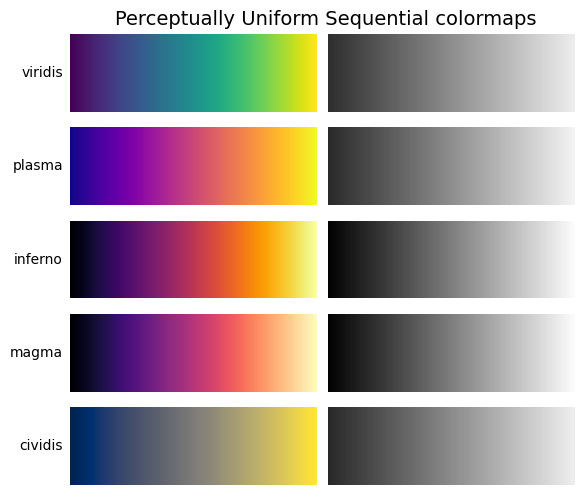

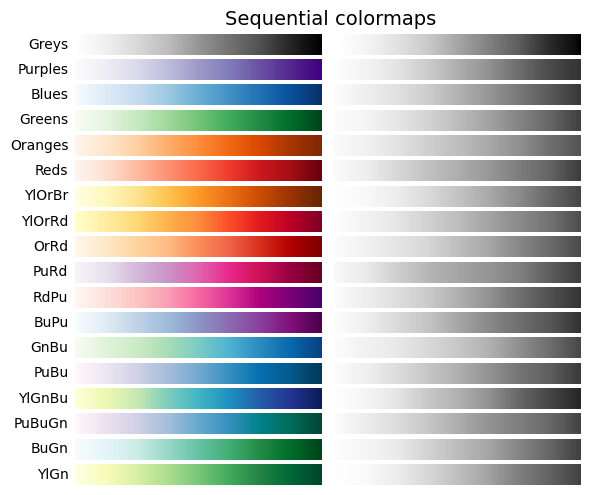

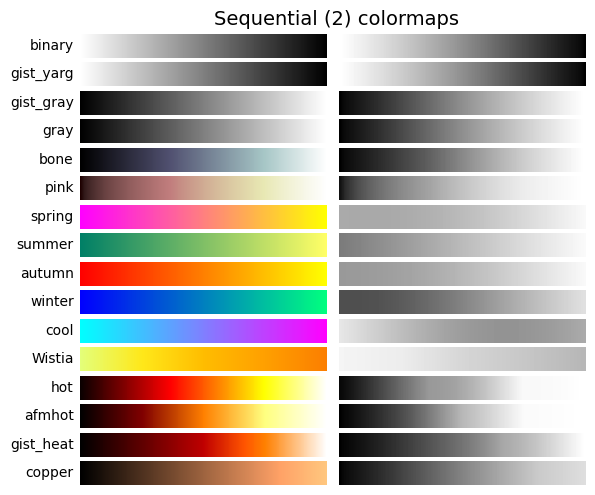

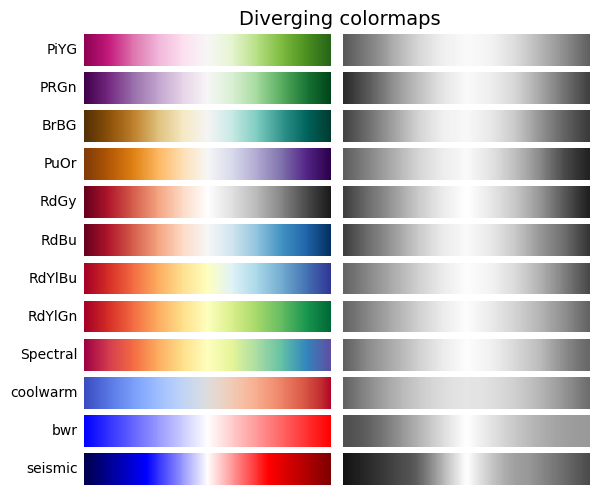

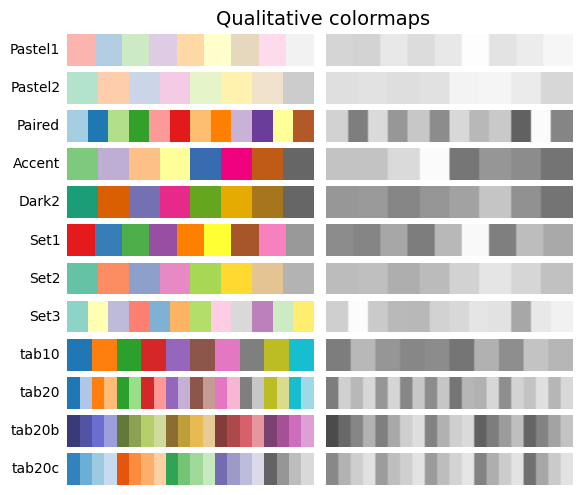

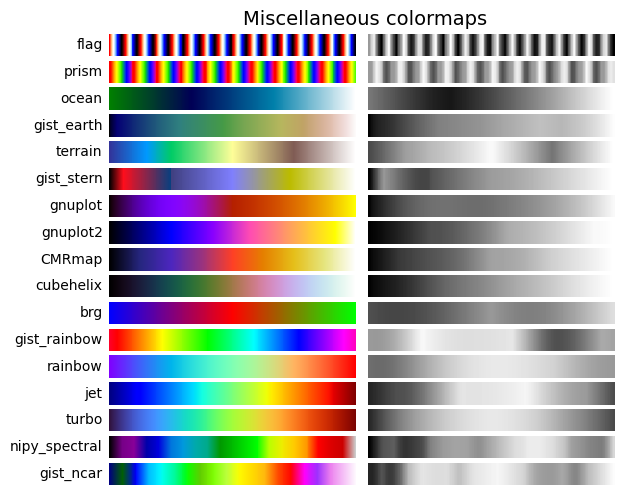

In [12]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = mpl.colormaps[name](x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)

## Color vision deficiencies

There is a lot of information available about color blindness (*e.g.*,
[colorblindness]_). Additionally, there are tools available to convert images
to how they look for different types of color vision deficiencies.

The most common form of color vision deficiency involves differentiating
between red and green. Thus, avoiding colormaps with both red and green will
avoid many problems in general.


## References

.. [Ware] http://ccom.unh.edu/sites/default/files/publications/Ware_1988_CGA_Color_sequences_univariate_maps.pdf
.. [Moreland] http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf
.. [list-colormaps] https://gist.github.com/endolith/2719900#id7
.. [mycarta-banding] https://mycarta.wordpress.com/2012/10/14/the-rainbow-is-deadlong-live-the-rainbow-part-4-cie-lab-heated-body/
.. [mycarta-jet] https://mycarta.wordpress.com/2012/10/06/the-rainbow-is-deadlong-live-the-rainbow-part-3/
.. [kovesi-colormaps] https://arxiv.org/abs/1509.03700
.. [bw] https://tannerhelland.com/3643/grayscale-image-algorithm-vb6/
.. [colorblindness] http://www.color-blindness.com/
.. [IBM] https://doi.org/10.1109/VISUAL.1995.480803
.. [turbo] https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html

